# Compare Sample Means (parametric)
- Student’s t-test
- Paired Student’s t-test
- Analysis of Variance Test (ANOVA)
- Repeated Measures ANOVA Test

## t-test
- It compares **mean** of **two groups**
- It is a parametric statistical test.
- It's used to study if there is **statistical difference** between **two groups**

## Types of t-test
- One sample t-test
- Paired t-test(Dependent)
- Unpaired t-test(Independent)

Unpaired t-test also have 2 categories 

- Student's t-test
  - Equal variance
  - Two sample t-test
- Welch t-test
  - Unequal variance
  - Unequal variance t-test

## Selection of t-test
- One sample t-test(for one sample)
- Paired t-test(for dependent samples)
- Student t-test(When sample size and variance are equal)
- Welch t-test(When sample size and variance are different)


In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
sns.set(font_scale=2, palette= "viridis")
from sklearn.preprocessing import scale
import researchpy as rp
from scipy import stats

In [2]:
data = pd.read_csv('../data/pulse_data.csv')
data.shape

(108, 12)

In [ ]:
data.head()

## One Sample t-test
It compares the mean of one sample 
- Known(from previous study) mean ($\mu$)
- Hypothetical mean($\mu$)

### Interpretation
__Question: Is the average height different from a established height?__

__Hypothesis__ 
- H0: The average age is $\mu$ = 20
- Ha: The average age is $\mu$ $\neq$ 20

In [3]:
data['Height'].describe() 

count    108.000000
mean       1.732685
std        0.101213
min        1.400000
25%        1.660000
50%        1.730000
75%        1.800000
max        1.950000
Name: Height, dtype: float64

In [4]:
stats.skew(data['Height'])

-0.1742048843725248

In [5]:
stats.kurtosis(data['Height'])

0.12817692328295882

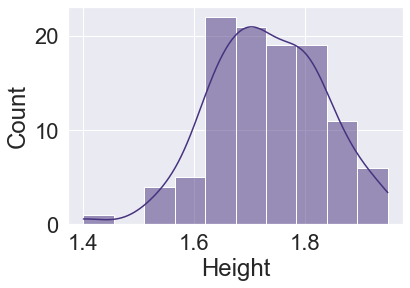

In [6]:
sns.histplot(data['Height'], kde=True)
plt.show() 

In [7]:
stats.ttest_1samp(data['Height'], 20)

Ttest_1sampResult(statistic=-1875.6386446869226, pvalue=1.7006070725409894e-243)

In [8]:
stat, p,  = stats.ttest_1samp(data['Age'], 20)
print(f'stat={stat}, p-value={p}') 
alpha = 0.05 
if p > alpha:
    print('The average age is 20(fail to reject H0, result is not significant)')
else:
    print('The average age is not 20(reject H0, result is significant)')

stat=1.5578736387208711, p-value=0.12221613857427135
The average age is 20(fail to reject H0, result is not significant)


## Student's t-test
- The independent t-test is also called the two sample t-test, student’s t-test, or unpaired t-test. 
- It’s an univariate test that tests for a significant difference between the mean of two unrelated groups.
- It compares the mean of two independent samples.

## Assumptions
The assumptions that the data must meet in order for the test results to be valid are:
- The independent variable (IV) is categorical with at least two levels (groups)
- The dependent variable (DV) is continuous which is measured on an interval or ratio scale
- The distribution of the two groups should follow the normal distribution
- The variances between the two groups are equal
    - This can be tested using statistical tests including Levene’s test, F-test, and Bartlett’s test.

If any of these assumptions are violated then another test should be used.


### Interpretation
__Question: Is there a difference in the height between men and women?__

__Hypothesis__
- H0: the means of the samples are equal.
- Ha: the means of the samples are unequal.

__References__

https://pythonfordatascienceorg.wordpress.com/independent-t-test-python/

In [9]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
data['Height'].describe()

count    108.000000
mean       1.732685
std        0.101213
min        1.400000
25%        1.660000
50%        1.730000
75%        1.800000
max        1.950000
Name: Height, dtype: float64

In [11]:
data.shape

(108, 12)

In [12]:
data.groupby('Gender')['Height'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,50.0,1.659200,0.075831,1.40,1.6225,1.65,1.7100,1.80
Male,58.0,1.796034,0.073935,1.67,1.7500,1.80,1.8475,1.95


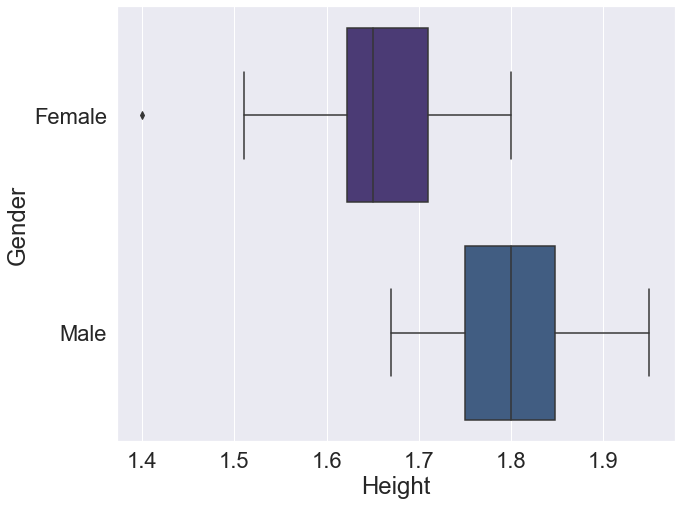

In [13]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data, x='Height', y="Gender")
plt.show()

In [14]:
# Subsets of data 
sample_01 = data[(data['Gender'] == 'Male')]

sample_02 = data[(data['Gender'] == 'Female')]

In [15]:
sample_01.shape, sample_02.shape

((58, 12), (50, 12))

In [16]:
# sample size should be equal 
sample_01 = sample_01.sample(50)
sample_01.shape, sample_02.shape

((50, 12), (50, 12))

## The Hypothesis Being Tested

* Null Hypothesis (H0): u1 = u2, which translates to the mean of `sample_01` is equal to the mean of `sample 02`
* Alternative Hypothesis (H1): u1 ? u2, which translates to the means of `sample01` is not equal to `sample 02`

## Homogeneity of variance
Of these tests, the most common assessment for homogeneity of variance is Levene's test. The Levene's test uses an F-test to test the null hypothesis that the variance is equal across groups. A p value less than .05 indicates a violation of the assumption.

https://en.wikipedia.org/wiki/Levene%27s_test

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html

To know, [Click here](https://en.wikipedia.org/wiki/Levene%27s_test) why we test for levene's test?

## Levene's test 
 Levene's test is an inferential statistic used to assess the equality of variances for a variable calculated for two or more groups
 
 ### Interpretation
 - H0: The variances are equal between two groups 
 - Ha: The variances are not equal between two groups 

In [18]:
stats.levene(sample_01['Height'], sample_02['Height'])

LeveneResult(statistic=0.003971792169895755, pvalue=0.9498772253776951)

In [21]:
stat, p,  = stats.levene(sample_01['Height'], sample_02['Height'])
print(f'stat={stat}, p-value={p}')
alpha = 0.05 
if p > alpha:
    print('The variances are equal between two groups(fail to reject H0, not significant)')
else:
    print('The variances are not equal between two groups(reject H0, significant)')

stat=0.003971792169895755, p-value=0.9498772253776951
The variances are equal between two groups(fail to reject H0, not significant)


__If the test were to be significant, a viable alternative would be to conduct a Welch’s t-test__

## Normal Distribution  of Residuals

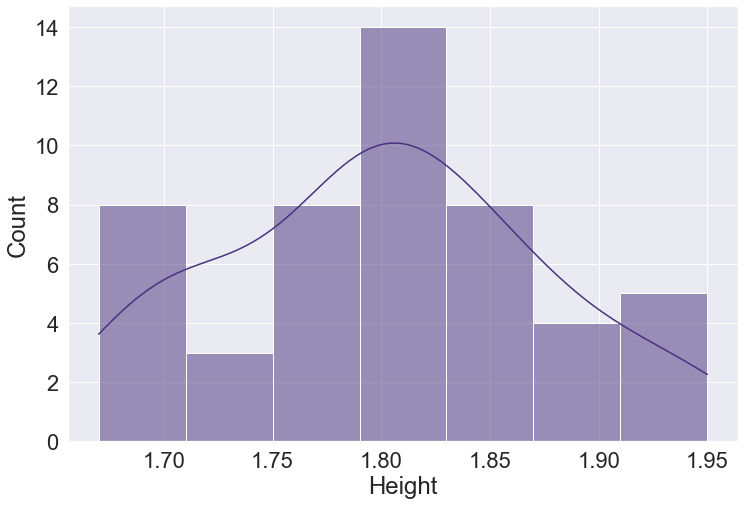

In [22]:
plt.figure(figsize=(12,8))
sns.histplot(sample_01['Height'], kde=True)
plt.show() 

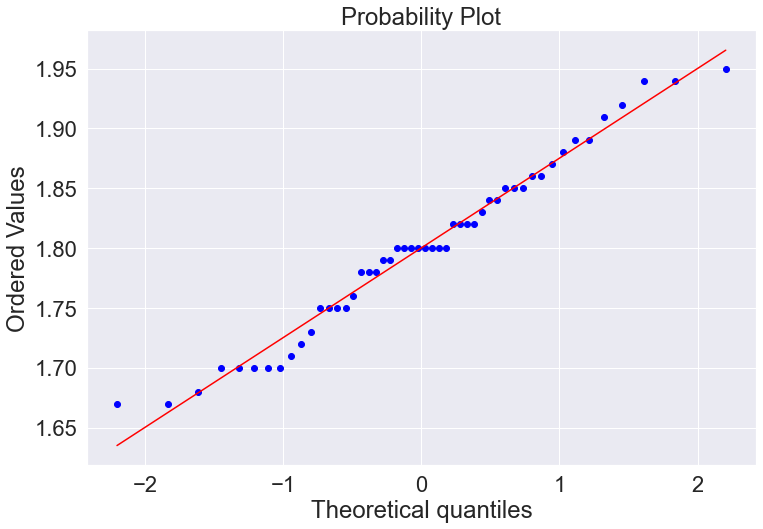

In [23]:
# Checking for normality by Q-Q plot graph
plt.figure(figsize=(12, 8))
stats.probplot(sample_01['Height'], plot=plt, dist='norm')
plt.show()

__the data should be on the red line. If there are data points that are far off of it, it’s an indication that there are some deviations from normality.__

### Checking normal distribution by `shapiro method`
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
- https://stats.stackexchange.com/questions/15696/interpretation-of-shapiro-wilk-test

In [24]:
stat, p_value = stats.shapiro(sample_01['Height'])
print(f'statistic = {stat}, p-value = {p_value}')
alpha = 0.05 
if p_value > alpha: 
    print("The sample has normal distribution(Fail to reject the null hypothesis, the result is not significant)")
else: 
    print("The sample does not have a normal distribution(Reject the null hypothesis, the result is significant)")

statistic = 0.9715633392333984, p-value = 0.2676459550857544
The sample has normal distribution(Fail to reject the null hypothesis, the result is not significant)


In [25]:
stat, p_value = stats.shapiro(sample_02['Height'])
print(f'statistic = {stat}, p-value = {p_value}')
alpha = 0.05 
if p_value > alpha: 
    print("The sample has normal distribution(Fail to reject the null hypothesis, the result is not significant)")
else: 
    print("The sample does not have a normal distribution(Reject the null hypothesis, the result is significant)")

statistic = 0.9614583253860474, p-value = 0.10232792049646378
The sample has normal distribution(Fail to reject the null hypothesis, the result is not significant)


__Note:-__[See here](https://stats.stackexchange.com/questions/15696/interpretation-of-shapiro-wilk-test)

W test statistic and the second value is the p-value. Since the test statistic does not produce a significant p-value, the data is indicated to be normally distributed

The data met all the assumptions for the t-test which indicates the results can be trusted and the t-test is an appropriate test to be used.

## Independent t-test by using `scipy.stats`

In [26]:
stats.ttest_ind(sample_01['Height'], sample_02['Height'])

Ttest_indResult(statistic=9.423826887131927, pvalue=2.156064530440312e-15)

In [28]:
stat, p,  = stats.ttest_ind(sample_01['Height'], sample_02['Height'])
print(f'stat={stat}, p-value={p}')
alpha =0.05 
if p > alpha:
    print('Accept null hypothesis that the means are equal between two groups')
else:
    print('Reject the null hypothesis that the means are not equal between two groups.')

stat=9.423826887131927, p-value=2.156064530440312e-15
Reject the null hypothesis that the means are not equal between two groups.


## Independent t-test using `researchpy`

https://researchpy.readthedocs.io/en/latest/ttest_documentation.html

In [29]:
rp.ttest(sample_01['Height'], sample_02['Height'])

(   Variable      N    Mean        SD        SE  95% Conf.  Interval
 0    Height   50.0  1.8002  0.073775  0.010433   1.779233  1.821167
 1    Height   50.0  1.6592  0.075831  0.010724   1.637649  1.680751
 2  combined  100.0  1.7297  0.102764  0.010276   1.709309  1.750091,
                 Independent t-test  results
 0  Difference (Height - Height) =    0.1410
 1            Degrees of freedom =   98.0000
 2                             t =    9.4238
 3         Two side test p value =    0.0000
 4        Difference < 0 p value =    1.0000
 5        Difference > 0 p value =    0.0000
 6                     Cohen's d =    1.8848
 7                     Hedge's g =    1.8703
 8                 Glass's delta =    1.9112
 9                             r =    0.6895)

In [32]:
descriptives, results = rp.ttest(sample_01['Height'], sample_02['Height'])

In [33]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Height,50.0,1.8002,0.073775,0.010433,1.779233,1.821167
1,Height,50.0,1.6592,0.075831,0.010724,1.637649,1.680751
2,combined,100.0,1.7297,0.102764,0.010276,1.709309,1.750091


In [34]:
results

,Independent t-test,results
0,Difference (Height - Height) =,0.1410
1,Degrees of freedom =,98.0000
2,t =,9.4238
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,1.8848
7,Hedge's g =,1.8703
8,Glass's delta =,1.9112
9,r =,0.6895


## Paired t-test
- It compares the mean between two related samples.(each subject is measured twice)

In [35]:
bp_reading = pd.read_csv('../data/blood_pressure.csv')
bp_reading.head() 

,patient,sex,agegroup,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [36]:
bp_reading.shape

(120, 5)

In [37]:
bp_reading.describe().T

,count,mean,std,min,25%,50%,75%,max
patient,120.0,60.500000,34.785054,1.0,30.75,60.5,90.25,120.0
bp_before,120.0,156.450000,11.389845,138.0,147.00,154.5,164.00,185.0
bp_after,120.0,151.358333,14.177622,125.0,140.75,149.5,161.00,185.0


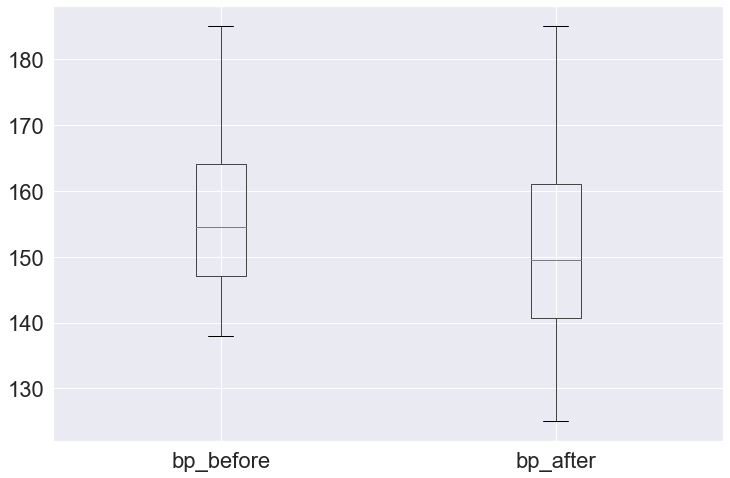

In [38]:
bp_reading[['bp_before', 'bp_after']].boxplot(figsize=(12, 8))
plt.show() 

## The Hypothesis Being Tested
* Null Hypothesis (H0): u1 = u2, which translates to the mean of sample 01 is equal to the mean of sample 02
* Alternative hypothesis (Ha): u1 ? u2, which translates to the means of sample 01 is not equal to sample 02

## Assumption check 

* The samples are independently and randomly drawn
* The distribution of the residuals between the two groups should follow the normal distribution
* The variances between the two groups are equal

In [39]:
stat, p,  = stats.levene(bp_reading['bp_after'], bp_reading['bp_before'])
print(f'stat={stat}, p-value={p}')
alpha = 0.05 
if p > alpha:
    print('Accept null hypothesis that the variances are equal between two groups')
else:
    print('Reject the null hypothesis that the variances are not equal between two groups.')

stat=4.863729003161597, p-value=0.028383666362347747
Reject the null hypothesis that the variances are not equal between two groups.


In [ ]:
bp_reading['bp_diff'] = scale(bp_reading['bp_after'] - bp_reading['bp_before'])
bp_reading.head() 

In [ ]:
bp_reading[['bp_diff']].head()

In [ ]:
bp_reading[['bp_diff']].hist(figsize=(12, 8))
plt.show() 

In [ ]:
plt.figure(figsize=(15, 8))
stats.probplot(bp_reading['bp_diff'], plot=plt)

plt.title('Blood pressure difference Q-Q plot')
plt.show()

**Note:-** The corresponding points are lies very close to line that means are our sample data sets are normally distributed

In [ ]:
stat, p_value = stats.shapiro(bp_reading['bp_diff'])
print(f'statistic = {stat}, p-value = {p_value}')
alpha = 0.05 
if p_value > alpha: 
    print("The sample has normal distribution(Fail to reject the null hypothesis, the result is not significant)")
else: 
    print("The sample does not have a normal distribution(Reject the null hypothesis, the result is significant)")

## Using Researchpy
- https://researchpy.readthedocs.io/en/latest/ttest_documentation.html

In [40]:
rp.ttest(bp_reading['bp_after'], bp_reading['bp_before'], 
         paired = True, equal_variances=False)

,Wilcoxon signed-rank test,results
0,Mean for bp_after =,151.358333
1,Mean for bp_before =,156.450000
2,T value =,2234.500000
3,Z value =,-3.191600
4,Two sided p value =,0.001400
5,r =,-0.206000


## Welch's t-test
- It compares the mean of two independent samples.
- It assumes:
  - Samples don't have equal variance
  - Sample size is not equal. 
  
Welch's t-test Assumptions
Like every test, this inferential statistic test has assumptions. The assumptions that the data must meet in order for the test results to be valid are:

- The independent variable (IV) is categorical with at least two levels (groups)
- The dependent variable (DV) is continuous which is measured on an interval or ratio scale
- The distribution of the two groups should follow the normal distribution
If any of these assumptions are violated then another test should be used.

## Interpretation
- **Null hypothesis (H0):** u1 = u2, which translates to the mean of sample 1 is equal to the mean of sample 2
- **Alternative hypothesis (HA):** u1 ≠ u2, which translates to the mean of sample 1 is not equal to the mean of sample 2

In [ ]:
us_mortality = pd.read_csv('../data/USRegionalMortality.csv')
us_mortality.head() 

In [ ]:
sample_01 = us_mortality[(us_mortality['Cause'] == "Heart disease") & (us_mortality['Sex'] == 'Male')]

sample_02 = us_mortality[(us_mortality['Cause'] == "Heart disease") & (us_mortality['Sex'] == 'Female')]

In [ ]:
sample_01.shape, sample_02.shape

In [ ]:
stat, p_value =stats.shapiro(sample_01['Rate'])
print(f'statistic = {stat}, p-value = {p_value}')
alpha = 0.05 
if p_value > alpha: 
    print("The sample has normal distribution(Fail to reject the null hypothesis, the result is not significant)")
else: 
    print("The sample does not have a normal distribution(Reject the null hypothesis, the result is significant)")

In [ ]:
stat, p_value =stats.shapiro(sample_02['Rate'])
print(f'statistic = {stat}, p-value = {p_value}')
alpha = 0.05 
if p_value > alpha: 
    print("The sample has normal distribution(Fail to reject the null hypothesis, the result is not significant)")
else: 
    print("The sample does not have a normal distribution(Reject the null hypothesis, the result is significant)")

In [ ]:
stats.ttest_ind(sample_01['Rate'], sample_02['Rate'], equal_var = False)

In [ ]:
stat, p_value =stats.ttest_ind(sample_01['Rate'], sample_02['Rate'], equal_var = False)
print(f'statistic = {stat}, p-value = {p_value}')
alpha = 0.05 
if p_value > alpha: 
    print("The sample means are equal (Fail to reject the null hypothesis, the result is not significant)")
else: 
    print("The sample means are not equal (Reject the null hypothesis, the result is significant)")

## Using Researchpy
- https://researchpy.readthedocs.io/en/latest/ttest_documentation.html

In [ ]:
des, res = rp.ttest(sample_01['Rate'], sample_01['Rate'],
                            equal_variances= False)

In [ ]:
des

In [ ]:
res 